# Test Notebook

## Some LaTeX

### Problem: Being unemployed with a chance of an offer
An unemployed worker samples wage offers on the following terms: each period, with probability $\phi, 1>\phi>0$, she receives no offer (we may regard this as a wage offer of zero forever). With probability $(1-\phi)$ she receives an offer to work for $w$ forever, where $w$ is drawn from a cumulative distribution function $F(w)$. Assume that $F(0)=0, F(B)=1$ for some $B>0$. Successive draws across periods are independently and identically distributed. The worker chooses a strategy to maximize
$$
E \sum_{t=0}^{\infty} \beta^{t} y_{t}, \quad \text { where } \quad 0<\beta<1
$$
$y_{t}=w$ if the worker is employed, and $y_{t}=c$ if the worker is unemployed. Here $c$ is unemployment compensation, and $w$ is the wage at which the worker is employed. Assume that, having once accepted a job offer at wage $w$, the worker stays in the job forever.

Let $v(w)$ be the expected value of $\sum_{t=0}^{\infty} \beta^{t} y_{t}$ for an unemployed worker who has offer $w$ in hand and who behaves optimally. Write the Bellman equation for the worker's problem.
\end{exercise}

#### Answer
Assume that the worker have an offer of $w$, if not then the worker makes no decision. The Bellman equation for this problem is:
$$
\begin{aligned}
v(w) &= \max_{\text{accept, reject}}\left\{\frac{w}{1-\beta}, \quad c + \beta \mathbb{E}[v(w')]\right\}\\
     &= \max_{\text{accept, reject}}\left\{\frac{w}{1-\beta}, \quad c + \beta \phi c + \beta (1-\phi) \int_{0}^B w'dF(w') \right\}
\end{aligned}
$$

## Some Code

In [1]:
# we calculate the n-th Fibonacci number 
function fib(n)
  x,y = (0,1)
  for i = 1:n x,y = (y, x+y) end
  x
end

fib (generic function with 1 method)

In [2]:
# Here we print it
fib(20)

6765

In [3]:
# This is a more elegant recursive way to do it 
fib_rec(n) = n < 2 ? n : fib(n-1) + fib(n-2)

fib_rec (generic function with 1 method)

In [4]:
# we get an array of the first 10 
fib10 = [fib_rec(n) for n ∈ 1:10]

10-element Vector{Int64}:
  1
  1
  2
  3
  5
  8
 13
 21
 34
 55

If we want to print this in a more sophisticated and good looking way we can do:

In [7]:
using Latexify

display(latexify(fib10))

L"\begin{equation}
\left[
\begin{array}{c}
1 \\
1 \\
2 \\
3 \\
5 \\
8 \\
13 \\
21 \\
34 \\
55 \\
\end{array}
\right]
\end{equation}
"

## Some Figures

In [35]:
using Plots, LaTeXStrings
theme(:vibrant) # un-coment for final version
default(fontfamily="Computer Modern", framestyle=:box) # LaTex-style

### Simple Figure

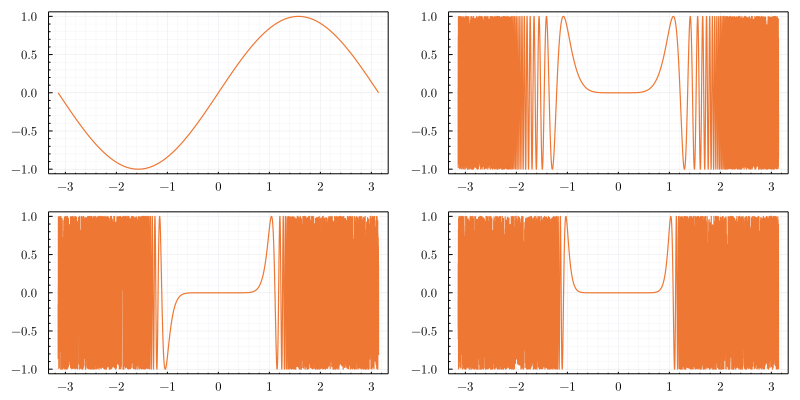

In [68]:
x = -π:0.001:π
y(n) = sin.(x.^n)

plot(x, y.(1:5:20), layout=(2,2), label="" , size = (800, 400))

### A more complicated one

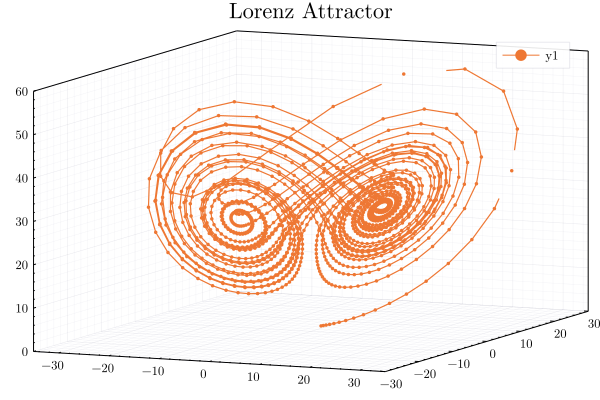

In [13]:
# define the Lorenz attractor
Base.@kwdef mutable struct Lorenz
    dt::Float64 = 0.02
    σ::Float64 = 10
    ρ::Float64 = 28
    β::Float64 = 8/3
    x::Float64 = 1
    y::Float64 = 1
    z::Float64 = 1
end

function step!(l::Lorenz)
    dx = l.σ * (l.y - l.x)
    dy = l.x * (l.ρ - l.z) - l.y
    dz = l.x * l.y - l.β * l.z
    l.x += l.dt * dx
    l.y += l.dt * dy
    l.z += l.dt * dz
end

attractor = Lorenz()


# initialize a 3D plot with 1 empty series
plt = plot3d(
    1,
    xlim = (-35, 35),
    ylim = (-30, 30),
    zlim = (0, 60),
    title = "Lorenz Attractor",
    marker = 2,
)

for i=1:1500
    step!(attractor)
    push!(plt, attractor.x, attractor.y, attractor.z)
end

plt